In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

In [2]:
df = pd.read_csv('data.txt', sep=' ', header=None)

In [3]:
print(df.head())

      0      1  2
0  1.30 -0.540  1
1 -2.30 -2.500  1
2 -0.37 -0.047  1
3  0.49  0.790  1
4  1.00  0.950  1


In [4]:
#converting pandas dataframe to array
X = df.values

In [5]:
#taking 3rd column as labels
labels = X.T[2]

In [6]:
#trimming X with last column and keeping 1st and 2nd
X = X[:,[0,1]]

In [7]:
def gen_thetas():
    #generating 3 thetas
    poly = np.random.uniform(-0.01,0.01, 3)
    return poly

In [22]:
#learning rate
alpha = 0.01

#dividing dataframe to separate 0's and 1's 
df_new1 = df.head(50)
df_new2 = df.tail(50)

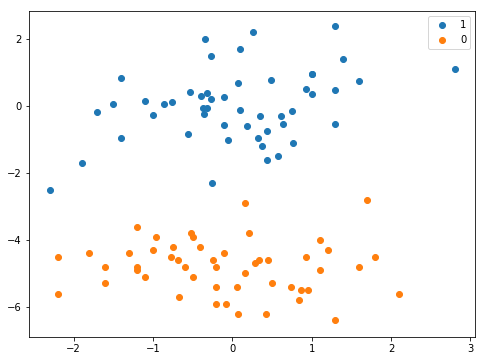

In [9]:
#plotting data points
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_new1[0],df_new1[1], label = '1')

plt.scatter(df_new2[0],df_new2[1], label = '0')

plt.legend()
plt.show()



In [10]:
# get initial thetas
thetas = gen_thetas()

In [11]:
thetas

array([ 0.00780814,  0.00441117, -0.00360915])

In [12]:
def model(thetas, x1, x2):
    return thetas[0] + thetas[1]*x1 + thetas[2]*x2

def prediction(thetas, x1): #x1 is list here
    y_predicted = []
    for i in range(len(x1)):
        y_predicted.append((thetas[0] + thetas[1]*x1[i]) * (-1/thetas[2]))
    return y_predicted

In [13]:
def sigmoid(x):
    return 1. /(1. + math.exp(-x))

In [14]:
#initial prediction
y_init = prediction(thetas,X.T[0])

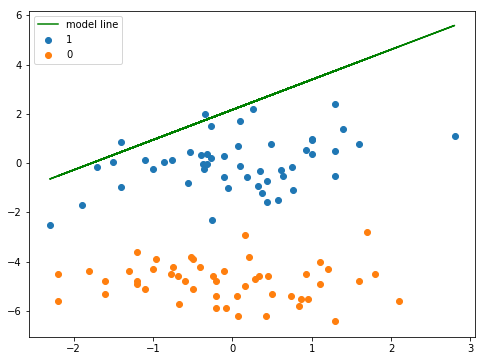

In [16]:
#plotting initial line
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_new1[0],df_new1[1], label = '1')

plt.scatter(df_new2[0],df_new2[1], label = '0')

plt.plot(X.T[0],y_init,'g', label = 'model line')

plt.legend()
plt.show()


In [17]:
def sgd(x1, x2, alpha, thetas, epochs=5000):
    
    for k in range(epochs):        
        for i in range(len(x1)):
            z = model(thetas, x1[i], x2[i])
            
            gradient  = labels[i] - sigmoid(z)
            thetas[0] = thetas[0] + alpha * gradient
            thetas[1] = thetas[1] + alpha * gradient * x1[i]
            thetas[2] = thetas[2] + alpha * gradient * x2[i]
            
    return thetas
            

In [23]:
#getting final thetas
t = sgd(X.T[0],X.T[1],alpha, thetas)

In [26]:
t

array([23.18941305, -3.99543127,  9.11136289])

In [24]:
#calculating final values of x2 after getting final thetas
y_new = prediction(t,X.T[0])

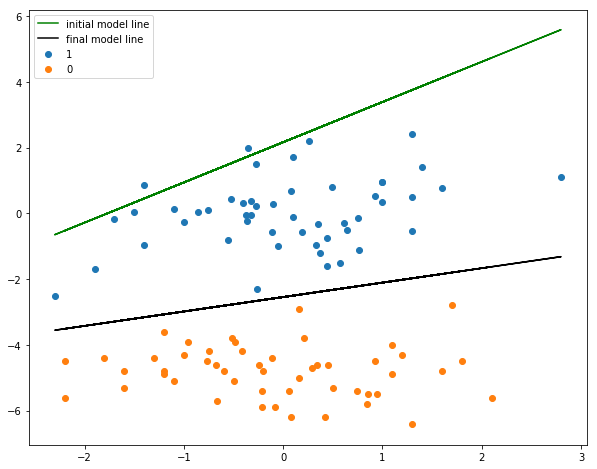

In [25]:
#final regression/ classification line
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_new1[0],df_new1[1], label = '1')

plt.scatter(df_new2[0],df_new2[1], label = '0')

plt.plot(X.T[0],y_init,'g', label = 'initial model line')
plt.plot(X.T[0],y_new,'black', label = 'final model line')

plt.legend()
plt.show()
